In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(iris.target)

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predictions))

MSE: 0.03866591237825794


In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

Accuracy: 1.0


In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN Accuracy:", knn.score(X_test, y_test))

KNN Accuracy: 1.0


In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [11]:
from sklearn.metrics import r2_score

print("R2 Score:", r2_score(y_test, predictions))

R2 Score: 0.9442318571467433


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [1.         0.9047619  0.95238095 1.         0.95238095]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 10)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'n_neighbors': 1}


In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print("Decision Tree Accuracy:", tree.score(X_test, y_test))

Decision Tree Accuracy: 1.0


In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
print("Random Forest Accuracy:", forest.score(X_test, y_test))

Random Forest Accuracy: 1.0


In [16]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
print("SVM Accuracy:", svm.score(X_test, y_test))

SVM Accuracy: 1.0


In [17]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=50)
bagging.fit(X_train, y_train)
print("Bagging Accuracy:", bagging.score(X_test, y_test))

Bagging Accuracy: 1.0


In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
print("AdaBoost Accuracy:", ada.score(X_test, y_test))

AdaBoost Accuracy: 1.0


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", gb.score(X_test, y_test))

Gradient Boosting Accuracy: 1.0


In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.9191876  0.05549301]


In [22]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)
print("Pipeline Accuracy:", pipeline.score(X_test, y_test))

Pipeline Accuracy: 1.0


In [23]:
import joblib

joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']

In [24]:
loaded_model = joblib.load('linear_model.pkl')
print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))

Loaded Model Accuracy: 0.9442318571467433


- Data Collection → Using Pandas or external APIs
- Data Cleaning → Handling missing values, outliers
- Exploratory Data Analysis (EDA) → Using Seaborn/Matplotlib
- Feature Engineering → Scaling, encoding
- Model Selection → Comparing models
- Hyperparameter Tuning → GridSearchCV/RandomSearch
- Model Evaluation → Accuracy, ROC-AUC
- Deployment → Saving and deploying the model

In [25]:
from sklearn.preprocessing import FunctionTransformer

# Log transformation
log_transformer = FunctionTransformer(np.log1p, validate=True)
X_log = log_transformer.fit_transform(X_train)


In [27]:
pip install imblearn


     -------------------------------------- 258.3/258.3 kB 3.2 MB/s eta 0:00:00


In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)


In [30]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=LogisticRegression(), n_features_to_select=3)
selector.fit(X_train, y_train)
print("Selected Features:", selector.support_)


Selected Features: [False  True  True  True]


In [31]:
importances = forest.feature_importances_
for name, importance in zip(iris.feature_names, importances):
    print(f"{name}: {importance:.2f}")


sepal length (cm): 0.09
sepal width (cm): 0.04
petal length (cm): 0.47
petal width (cm): 0.40


In [32]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_neighbors': range(1, 30)}
rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5)
rand_search.fit(X_train, y_train)
print("Best Parameters:", rand_search.best_params_)


Best Parameters: {'n_neighbors': 14}


In [33]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rand_search, X_train, y_train, cv=5)
print("Nested CV Accuracy:", scores.mean())


Nested CV Accuracy: 0.9428571428571428


In [34]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC())
]

stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)
print("Stacking Accuracy:", stacking.score(X_test, y_test))


Stacking Accuracy: 1.0


In [35]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=estimators, voting='hard')
voting.fit(X_train, y_train)
print("Voting Accuracy:", voting.score(X_test, y_test))


Voting Accuracy: 1.0


In [36]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LogisticRegression())
])

pipeline.fit(X_train, y_train)
print("Pipeline Accuracy:", pipeline.score(X_test, y_test))


Pipeline Accuracy: 1.0


In [38]:
from sklearn.inspection import permutation_importance

results = permutation_importance(forest, X_test, y_test)
print(results.importances_mean)


[0.         0.         0.46666667 0.08888889]


In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
print("Cluster Centers:", kmeans.cluster_centers_)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dell\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\dell\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\dell\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\dell\anaconda3\lib\subprocess.py", line 951

Cluster Centers: [[6.85517241 3.10344828 5.70689655 2.02068966]
 [4.96451613 3.37741935 1.46451613 0.2483871 ]
 [5.79555556 2.69555556 4.34444444 1.41777778]]


In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_train)


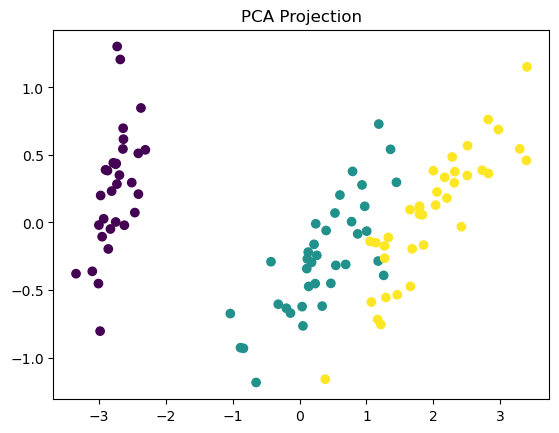

In [43]:

import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.title("PCA Projection")
plt.show()


In [44]:
import joblib

joblib.dump(pipeline, 'advanced_model.pkl')


['advanced_model.pkl']